## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a TPU or GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use:

In [1]:
!pip install gensim
!pip install wget

Now we can import these libraries:

In [2]:
# imports needed 
import gensim
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can find the file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [18]:
# download the dataset
wget.download("https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt")

100% [..........................................................................] 5447743 / 5447743

'shakespeare (1).txt'

Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [4]:
def read_input(input_file):
    print("reading file...")
    with open (input_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
    # do some pre-processing and return a (tokenized) list
    # of words for each review text
    # you can print the output here to understand
    # the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess(line)
# each review item new becomes a series of words
# this is a list of lists
# point to the location on your filesystem
data_file = 'shakespeare.txt'
documents = list (read_input(data_file))
print("Done reading data file")

reading file...
Done reading data file


In [5]:
documents

[[],
 [],
 ['the', 'sonnets'],
 [],
 ['by', 'william', 'shakespeare'],
 [],
 [],
 [],
 [],
 ['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
 ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
 ['and', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding'],
 ['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
 ['to', 'eat', 'the'

Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [6]:
model = gensim.models.Word2Vec (documents, size=150, window=5, min_count=2, workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6705163, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen is shakespeare!

In [7]:
w1 = "king"
model.wv.most_similar (positive=w1)

[('prince', 0.6644191741943359),
 ('fifth', 0.582672119140625),
 ('sixth', 0.5659297704696655),
 ('plantagenets', 0.5610256791114807),
 ('duke', 0.553136944770813),
 ('bolingbroke', 0.5333506464958191),
 ('dauphin', 0.5252446532249451),
 ('emperor', 0.5119510889053345),
 ('ghost', 0.5119189620018005),
 ('princess', 0.501387357711792)]

In [8]:
# look up top 6 words similar to 'smile'
w1 = "smile"
model.wv.most_similar (positive=w1)

[('tremble', 0.7312694787979126),
 ('laugh', 0.7096580862998962),
 ('shine', 0.7015079259872437),
 ('frown', 0.7009025812149048),
 ('rail', 0.6990920305252075),
 ('grieve', 0.6760901212692261),
 ('scowl', 0.6714715361595154),
 ('blush', 0.6547645926475525),
 ('bite', 0.6531240940093994),
 ('spit', 0.648943305015564)]

In [9]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('england', 0.6559731960296631),
 ('princess', 0.5710995197296143),
 ('ireland', 0.5707502365112305),
 ('greece', 0.5473451614379883),
 ('charles', 0.5458484888076782),
 ('burgundy', 0.5453023910522461)]

In [10]:
# look up top 6 words similar to 'sword'
w1 = ["sword"]
model.wv.most_similar (positive=w1,topn=6)

[('head', 0.7599679827690125),
 ('knife', 0.713915228843689),
 ('throat', 0.7082704901695251),
 ('pocket', 0.7009322643280029),
 ('weapon', 0.6990591287612915),
 ('finger', 0.6955606341362)]

In [11]:
# get everything related to stuff on the royalty and not related to farmer
w1 = ["king",'queen','prince']
w2 = ['farmer']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('princess', 0.6384561061859131),
 ('duke', 0.6093141436576843),
 ('emperor', 0.5442020893096924),
 ('cause', 0.5416064262390137),
 ('warwick', 0.5300273895263672),
 ('gods', 0.5066763758659363),
 ('bolingbroke', 0.5039039254188538),
 ('comfort', 0.49692922830581665),
 ('ghost', 0.49504509568214417),
 ('duchess', 0.4924558699131012)]

Explore the similarity (e.g. distance) between two words. Does it make sense?

In [12]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")

0.5426833

In [13]:
# similarity between two opposing words
model.wv.similarity(w1="king",w2="farmer")

0.0523917

Try some other combinations :) 

We can even use it to perform more 'smart' assigments: 

In [14]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

C:\Users\Asus\Anaconda3\envs\tf_gpu\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates of each word: 

In [15]:
model.wv['france']

array([ 0.19468077, -0.3046855 ,  0.6537765 , -0.59221745, -0.346844  ,
       -0.7798034 , -0.4068021 ,  0.0342313 ,  0.25183484,  0.8707178 ,
       -0.21151876, -0.8841822 ,  1.0047541 ,  2.2306612 , -0.96432006,
        0.5535074 , -0.35709125, -0.1586091 ,  0.8927897 ,  0.25503832,
       -0.04416256, -1.5103266 , -0.42253605,  0.22898056,  0.5210132 ,
        0.54373336, -0.13593532,  0.26793292,  0.37943265, -0.99021834,
        0.43718773,  0.40049848, -0.3074631 , -0.56374377, -1.0442878 ,
       -0.90582883,  2.3829837 ,  0.71741027,  0.2658215 ,  0.08888919,
        0.79254663,  0.298945  ,  0.0045998 , -0.7156625 ,  1.7606748 ,
        0.03588946, -0.5461906 ,  1.1074663 , -0.9334237 ,  0.16271822,
       -1.0029272 ,  0.8849897 ,  0.28032973, -0.4641849 , -0.9976881 ,
       -0.5913195 , -1.3202628 , -0.10718711, -1.2030958 ,  1.5277572 ,
       -0.7366108 , -0.12802558, -0.79113466,  0.16159663, -0.14257304,
        0.14135024,  0.20995958,  0.50565416,  0.42505163, -0.05

## Bonus: visualising our model in t-SNE: 

C:\Users\Asus\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


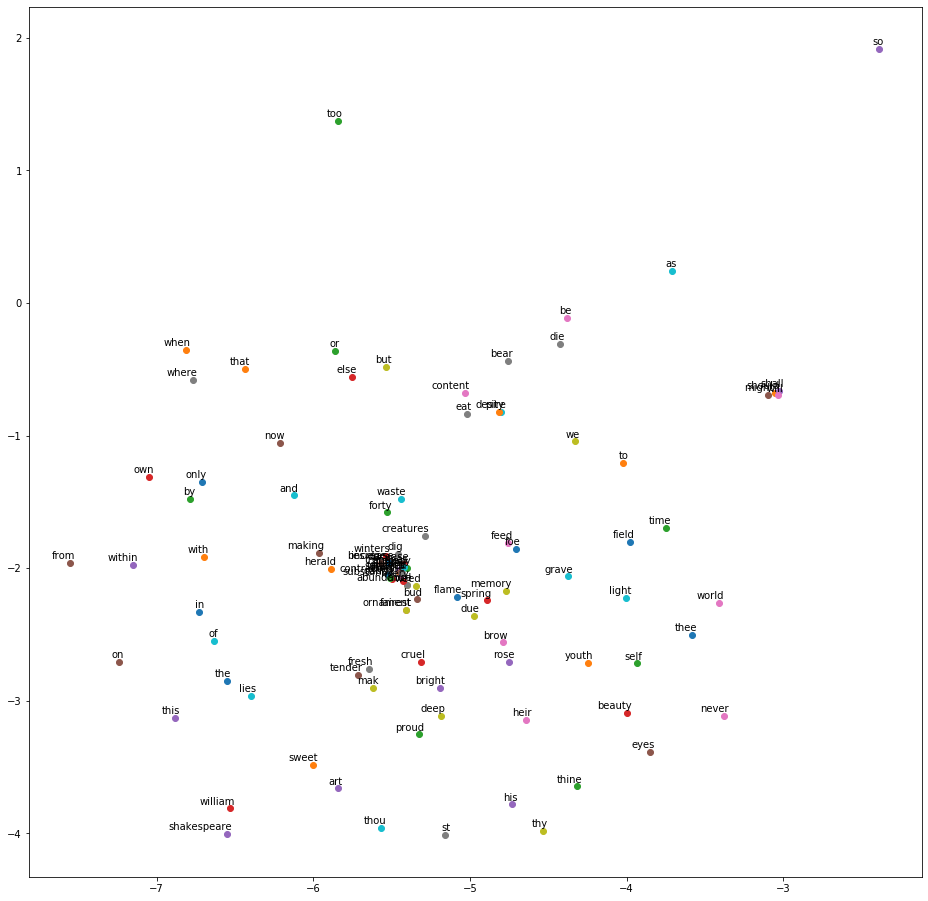

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"

    labels = []
    tokens = []
    
    count = 0
    for word in model.wv.vocab:
        # to speed up the process, let's limit to the first 100 elements
        if count < 100:
            tokens.append(model[word])
            labels.append(word)
            # TODO get the labels
            count = count+1

    # set the t-sne values
    # TODO fit the t-sne model
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', n_iter = 2500, random_state=100)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5